In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import glob

In [3]:
plt.style.use("seaborn-whitegrid")

##### Reading the data & understanding it

In [4]:
price_csv = [pd.read_csv(csv) for csv in glob.glob("datasets/*.csv")]
prices = pd.concat(price_csv, axis=1)
prices.head()

,"4070, Granaatõun, kg","4111, Õun Golden Delicious, kg","4113, Õun Royal Gala, kg","4129, Õun Kanzi, kg","4048, Õun Granny Smith, kg","4109, Õun (erinevad sordid), kg","Õun GRANNY SMITH 1kl., kg","Õun GOLDEN Delicious suur 1kl., kg","Õun RED DELICIOUS 1kl., kg","Õun KANZI 1kl., kg",...,"Nisujahu T-405 1 kg, KALEW","1002360, Nisujahu 0 Manitoba Il Molino Chiavazza 1kg","194914, Nisujahu 00 Pitsa Il Molino Chiavazza 1kg",Täisteranisujahu VESKI MATI 1kg,Eriti hea nisujahu VESKI MATI 1kg,Veski Mati Nisujahu 1kg isekerkiv,"Linda nisujahu T550 1 kg, LINDA","Myllyn Paras erinisujahu 1 kg, MYLLYN PARAS","Myllyn Paras Emännän pooljäme nisujahu 1 kg, MYLLYN PARAS","Myllyn Paras jäme nisujahu 1 kg, MYLLYN PARAS"
0,3.99,2.49,1.49,3.99,2.49,0.42,2.49,1.89,1.99,2.59,...,1.09,2.99,2.39,1.15,1.45,1.69,0.89,1.59,1.19,1.49
1,3.99,2.49,1.49,3.99,2.49,0.59,2.49,1.89,1.99,2.59,...,1.09,2.99,2.39,1.15,1.45,1.69,0.89,1.59,1.19,1.49
2,3.99,2.49,1.49,3.99,2.49,0.59,2.49,1.69,1.99,2.59,...,1.09,2.99,2.39,1.15,1.45,1.69,0.89,1.59,1.19,1.49
3,3.99,2.49,1.49,3.99,2.49,0.59,2.49,1.69,1.99,2.59,...,1.09,2.99,2.39,1.15,1.45,1.69,0.89,1.59,1.19,1.49
4,3.99,2.49,1.49,3.99,2.49,0.59,2.49,1.69,1.99,2.59,...,1.09,2.99,2.39,1.15,1.45,1.69,0.89,1.59,1.19,1.49


In [5]:
prices.shape

(79, 871)

871 products with 79 days of price data.

To get some insights about the data, I regressed one Rimi milk to other store milks and scattered a plot afterwards to see, whether R² actually makes sense and if some further actions are needed.

Model has one feature. It being a product price.

In [6]:
alma_milk = prices["200289, Piim Alma kile 2,5% 1l"]
other_milks = prices[["2371610, Piim rasvatu 0,05%, ALMA, 1 l",
"28638, Piim UHT 3,8%, MINUS L, 1 l",
"33238, Kitsepiim pastöriseerimata, ANDRI-PEEDO, 1 l",
"468784, Toorpiim pastöriseerimata, NOPRI, 1 l",
"4834, Piim 2,5%, TERE, 1 l",
"4856, Cappuccino piim 3,2%, TERE, 1 l",
"5237, Piim 2,5% pure, ALMA, 1 l",
"5246, Piim 2,5% kiles, ALMA, 1 l",
"Alma piim 0.05% 1L",
"Alma piim 2.5% 1L",
"Farmi piim 2.5% 1L kilepakk",
"Hapupiim 2,5%, 1 l, NOPRI",
"Hapupiim NOPRI 2,5%,1L",
"Kõrgkuumutatud cappuccino piim 3,2%, 1 l, TERE",
"Pastöriseerimata toorpiim, 1 l, NOPRI",
"Piim 0,05%, 1 l, ALMA",
"Piim 2,5%, 1 l, ALMA",
"Piim 2,5%, 1l, PERE",
"Piim 2,5%, D-vitamiiniga, 1 l, TERE",
"Piim ARMAS 2,5%, 1L kile",
"Piim ARMAS/ FARM MILK 2,5%, 1L kile",
"Piim FARM MILK 2% UHT, 1L",
"Piim FARM MILK 2,5%, 1L kile",
"Piim FARM MILK 3,2% UHT, 1L",
"Piim FARM MILK 3,2%, 1L",
"Piim FARMI 3,5%, 1L kile",
"Piim NEED4 CHOICE UHT 3,2%, lakt.vaba,1L",
"Piim TERE 2,5%, 1L",
"Piim TERE 2,5%, 1L kile",
"Piim TERE 2,5%, D-vitamiiniga 1L",
"Piim TERE 2,5%, D-vitamiiniga 1L kile",
"Piim TERE Capuccino 3,2%, 1L",
"Piim TERE D-vitamiin.lakt.vaba 2,5%., 1L",
"Tere Cappuccino piim 3.2% 1L",
"Tere piim 2.5% 1L D-vitamiiniga"]]

Training the models and plotting those, which have 1 >= R² >= -1

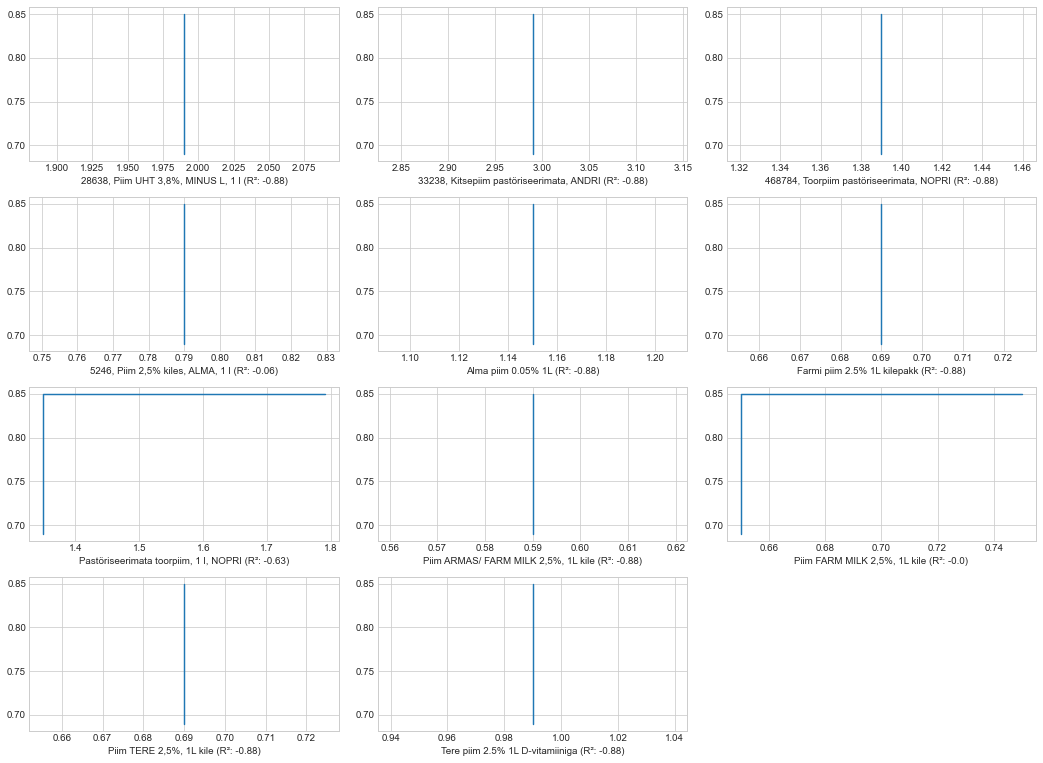

In [7]:
output = list()
fig = plt.figure(figsize=(15, 11), dpi=70)

enumeration = 1

for milk in other_milks:
    x = other_milks[milk]
    y = alma_milk

    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0, shuffle=False)
    ml_model = LinearRegression()

    plot_x = x_test

    x_train= x_train.values.reshape(-1, 1)
    x_test = x_test.values.reshape(-1, 1)

    ml_model.fit(x_train, y_train)
    y_pred = ml_model.predict(x_test)
    score = r2_score(y_test, y_pred)
    if score < 1 and score > -1:
        output.append(milk)
        plt.subplot(4, 3, enumeration)
        plt.xlabel(f'{milk[:40]} (R²: {round(score, 2)})')
        plt.plot(plot_x, y_test)
        enumeration += 1

plt.tight_layout()
plt.show()

Mostly negative correlation and no price change at all for most cases. Here I decided not to take negative correlation into consideration as inflation is somewhat always rising in the long-term.

Next step is to get more insights about overall data.

Following piece shows how did the prices change in average:

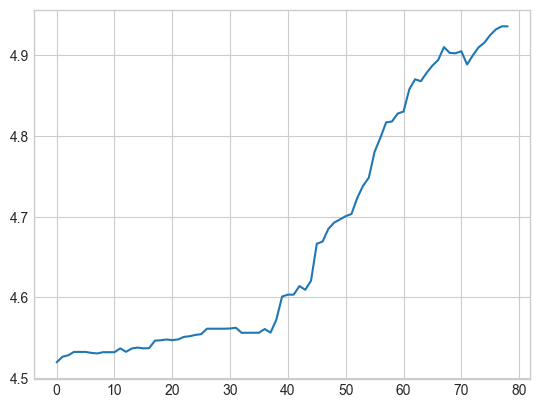

In [8]:
prices['mean'] = prices.mean(axis=1)
plt.plot(prices['mean'])

There seem to be the drastic price rise somewhere in April - May of 2022th.

#### Model building & results

I have chosen some set of variables to regress.
<table>
    <tr>
        <th>Response (dependent)</th>
        <th>Predictor (independent) parameters</th>
    </tr>
    <tr>
        <td>Every Rimi milk</td>
        <td>Every other market milk</td>
    </tr>
    <tr>
        <td>Pizza</td>
        <td>Beef</td>
    </tr>
    <tr>
        <td>Pizza</td>
        <td>Flour</td>
    </tr>
    <tr>
        <td>Pizza</td>
        <td>Beef, flour</td>
    </tr>
    <tr>
        <td>Cake</td>
        <td>Milk</td>
    </tr>
    <tr>
        <td>Cake</td>
        <td>Flour</td>
    </tr>
    <tr>
        <td>Cake</td>
        <td>Flour, milk</td>
    </tr>
    <tr>
        <td>Cake</td>
        <td>Flour, apple, pear</td>
    </tr>
</table>


To train the models I have split the data into train and test data: 80% train and 20% test using sklearn method.

Using sklearn LinearRegression, LassoCV and RidgeCV methods, I've resulted in ~24,000 models.
For instance, taking one pizza and one beef product to conduct regression:

In [9]:
pizza = prices["30389, Kiviahjupizza BBQ chicken, GRANDIOSA, 310 g"]
beef = prices["30937, Veisepraad kondita, KARNI, kg"]

In [10]:
beef.describe()

count    79.000000
mean     16.281139
std       1.769774
min      12.990000
25%      16.990000
50%      16.990000
75%      16.990000
max      17.990000
Name: 30937, Veisepraad kondita, KARNI, kg, dtype: float64

In [11]:
pizza.describe()

count    79.000000
mean      3.172278
std       0.337699
min       2.990000
25%       2.990000
50%       2.990000
75%       2.990000
max       3.790000
Name: 30389, Kiviahjupizza BBQ chicken, GRANDIOSA, 310 g, dtype: float64

Splitting and prepare the data:

In [12]:
x_train, x_test, y_train, y_test = train_test_split( beef, pizza, test_size=0.2, random_state=0, shuffle=False)

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)




Conduct regression and find out the R squared value:

In [13]:
ml_model = LinearRegression()
ml_model.fit(x_train, y_train)
y_pred = ml_model.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.0

Plot to see better output:

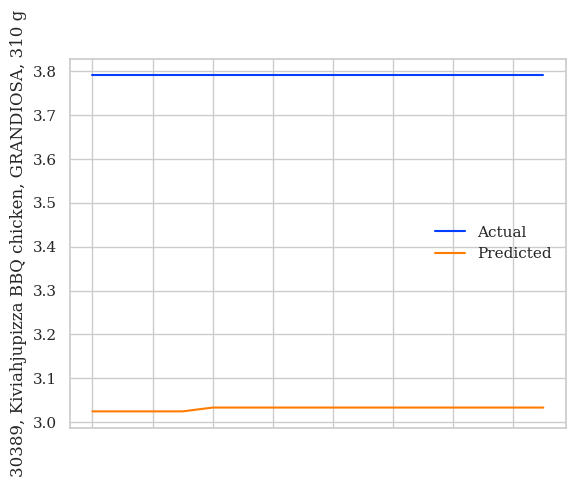

In [14]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette("bright")
plt.rcParams["font.family"] = "serif"
sns.lineplot(x=range(len(y_test)), y=y_test)
sns.lineplot(x=range(len(y_pred)), y=y_pred)
plt.legend(['Actual', 'Predicted'])
# plt.xlabel("Time")
plt.tick_params(labelbottom=False)

Natural outcome as R squared is zero.

For all of the variable pairs in Table 1, I conducted such process for all 3 regression techniques. Like that:

In [15]:
ml_model = LassoCV()
ml_model.fit(x_train, y_train)
y_pred = ml_model.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.0

In [16]:
ml_model = RidgeCV()
ml_model.fit(x_train, y_train)
y_pred = ml_model.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.0

This resulted in numerous .json format files with correlation data and variable (product) names.

Example of an entry in .json file:

<code>Javascript
{"dependent": "2477788, Glasuurkohuke šokolaadikook marmelaaditükkidega, LIISU, 38 g", "model": "lregression", "independent_parameters": ["4834, Piim 2,5%, TERE, 1 l"], "score": 0.4506078362464905}
</code>

Compiling all data into one, I resulted in:

In [17]:
jsons = [pd.read_json(json) for json in  glob.glob("correlation/*.json")]
jsons = pd.concat(jsons)

<AxesSubplot:xlabel='score', ylabel='Count'>

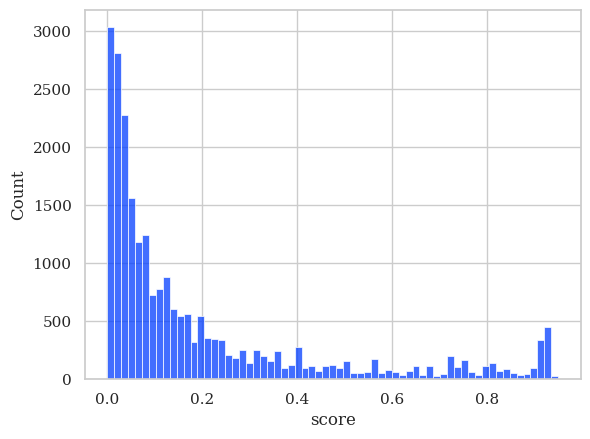

In [18]:
sns.histplot(jsons['score'])

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
jsons['score'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count   24011.000
mean        0.196
std         0.248
min         0.000
25%         0.031
50%         0.087
75%         0.244
85%         0.436
90%         0.639
100%        0.949
max         0.949
Name: score, dtype: float64

1. The data is spread far from mean and median values, which indicate high variance. 85% of all entries are of value less than 0.436 and 15% is the rest.
2. Histogram is left skewed, meaning majority of the models didn't output great results.

Next step is to divide models by their used model techniques.

In [20]:
regr = jsons[jsons["model"] == 'lregression']
lasso = jsons[jsons["model"] == 'lasso']
ridge = jsons[jsons["model"] == 'ridge']

#### Linear Regression:

<AxesSubplot:xlabel='score', ylabel='Count'>

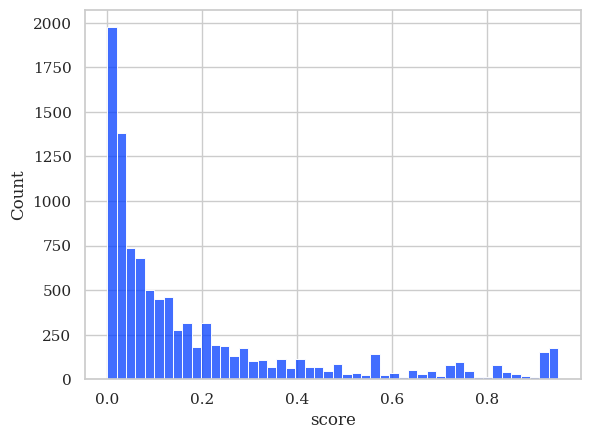

In [21]:
sns.histplot(regr.score)

In [22]:
regr['score'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count   10000.000
mean        0.190
std         0.241
min         0.000
25%         0.028
50%         0.089
75%         0.244
85%         0.408
90%         0.571
100%        0.949
max         0.949
Name: score, dtype: float64

#### Lasso Regression

<AxesSubplot:xlabel='score', ylabel='Count'>

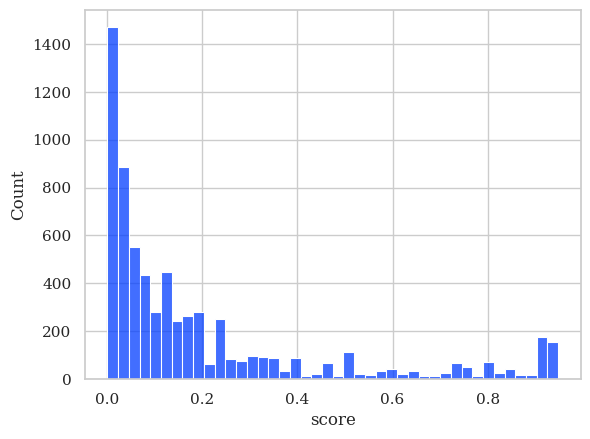

In [23]:
sns.histplot(lasso.score)

In [24]:
lasso['score'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count   6836.000
mean       0.204
std        0.257
min        0.000
25%        0.028
50%        0.095
75%        0.244
85%        0.466
90%        0.676
100%       0.948
max        0.948
Name: score, dtype: float64

#### Ridge Regression

<AxesSubplot:xlabel='score', ylabel='Count'>

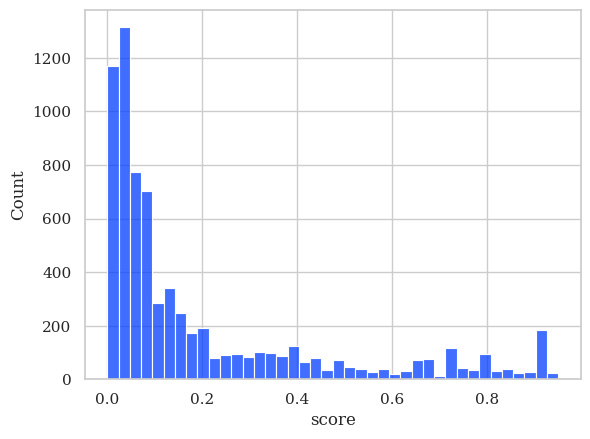

In [25]:
sns.histplot(ridge.score)

In [26]:
ridge['score'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count   7175.000
mean       0.198
std        0.248
min        0.000
25%        0.035
50%        0.079
75%        0.265
85%        0.456
90%        0.651
100%       0.949
max        0.949
Name: score, dtype: float64

1. Linear regression has more models. It might have happened due to the fact, that models do not have many features, thus Ridge and Lasso resulted worse overall, so those models were filtered out before.
2. In average, Ridge and Lasso models resulted in better models.
3. Linear regression has the least variance:

In [27]:
print(f"Ridge: {ridge['score'].var()}")
print(f"Lasso: {lasso['score'].var()}")
print(f"Linear: {regr['score'].var()}")

Ridge: 0.061733761286410255
Lasso: 0.0661374001834657
Linear: 0.0581294827357184


### Results

Out of ~24,000 models, let's take 15 of different kinds and evaluate their results.

In [28]:
top_ridge = ridge.sort_values(by=['score'], ascending=False).head(5)
top_lasso = lasso.sort_values(by=['score'], ascending=False).head(5)
top_regr = regr.sort_values(by=['score'], ascending=False).head(5)

In [29]:
top_ridge

,dependent,model,independent_parameters,score
2372,"934052, Pitsa salaami ja chorizo Feliciana 320g",ridge,"[194914, Nisujahu 00 Pitsa Il Molino Chiavazza...",0.949
2013,"952601, Pitsataigen Eesti Pagar 2x300g",ridge,"[1002360, Nisujahu 0 Manitoba Il Molino Chiava...",0.948
1221,"298171, Õuna-rabarberikook ELT 800g",ridge,"[Piim TERE 2,5%, D-vitamiiniga 1L kile, 194914...",0.945
3010,"194914, Nisujahu 00 Pitsa Il Molino Chiavazza 1kg",ridge,"[194914, Nisujahu 00 Pitsa Il Molino Chiavazza...",0.943
2058,"952601, Pitsataigen Eesti Pagar 2x300g",ridge,"[194914, Nisujahu 00 Pitsa Il Molino Chiavazza...",0.938


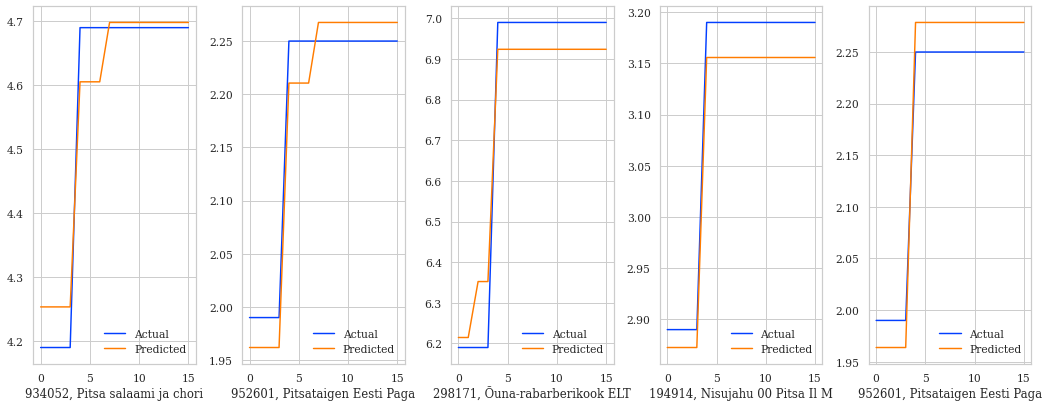

In [30]:
enumeration = 1

# removing duplicated columns
prices = prices.loc[:,~prices.columns.duplicated()].copy()
fig = plt.figure(figsize=(15, 6), dpi=70)
y_test_list = list()
y_pred_list = list()

for id, entry in top_ridge.iterrows():
    x = prices[entry['independent_parameters']]
    y = prices[entry['dependent']]
    
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0, shuffle=False)
    model = RidgeCV()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)

    plt.subplot(1, 5, enumeration)
    plt.plot(range(len(y_test)), y_test)
    plt.plot(range(len(y_pred)), y_pred)
    plt.legend(['Actual', 'Predicted'])
    plt.xlabel(entry['dependent'][:30])
    enumeration += 1

plt.tight_layout()
plt.show()


#### Error terms:

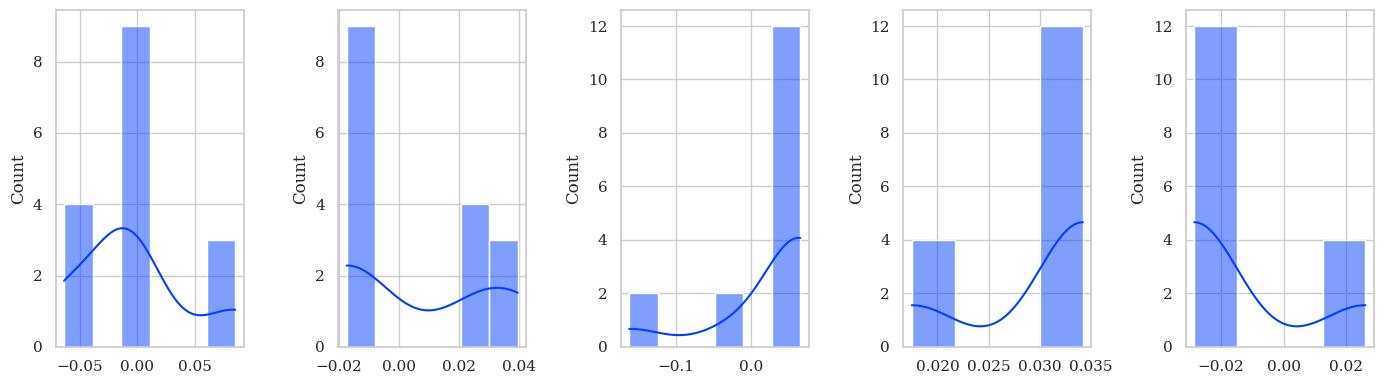

In [31]:
enumeration = 1
fig = plt.figure(figsize=(14, 4), dpi=100)
for i in range(5):
    plt.subplot(1, 5, enumeration)
    data = (y_test_list[i].values - y_pred_list[i])
    
    sns.histplot(data, bins=len(set(data)) * 2, kde=True)
    enumeration += 1
    
plt.tight_layout()
plt.show()

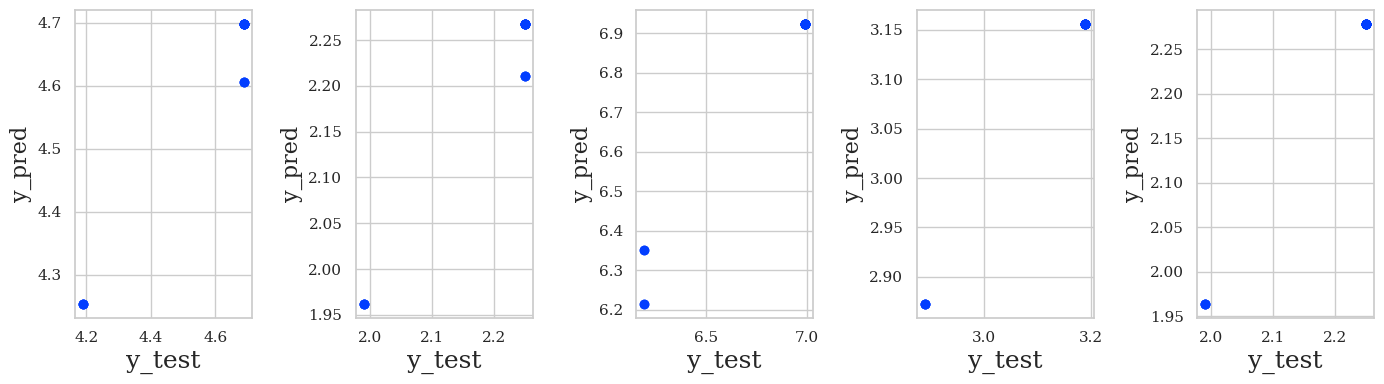

In [32]:
enumeration = 1
fig = plt.figure(figsize=(14, 4), dpi=100)
for i in range(5):
    plt.subplot(1, 5, enumeration)
    
    plt.scatter(y_test_list[i].values, y_pred_list[i])
    plt.xlabel('y_test')                         
    plt.ylabel('y_pred')
    enumeration += 1
    
plt.tight_layout()
plt.show()

In [33]:
top_lasso

,dependent,model,independent_parameters,score
1226,"298171, Õuna-rabarberikook ELT 800g",lasso,"[Piim 2,5%, 1 l, ALMA, 194914, Nisujahu 00 Pit...",0.948
2351,"296859, Singi-ja šampinjonipitsa külmut. 425g",lasso,"[194914, Nisujahu 00 Pitsa Il Molino Chiavazza...",0.943
1707,"952601, Pitsataigen Eesti Pagar 2x300g",lasso,"[194913, Nisujahu 00 Il Molino Chiavazza 1kg, ...",0.941
1288,"298171, Õuna-rabarberikook ELT 800g",lasso,"[5237, Piim 2,5% pure, ALMA, 1 l, 194914, Nisu...",0.940
1715,"952601, Pitsataigen Eesti Pagar 2x300g",lasso,"[194913, Nisujahu 00 Il Molino Chiavazza 1kg, ...",0.938


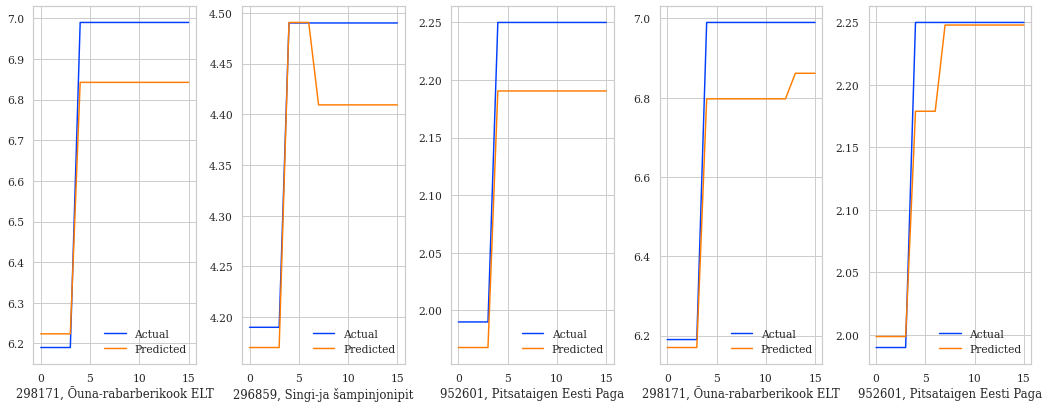

In [34]:
enumeration = 1

# removing duplicated columns
fig = plt.figure(figsize=(15, 6), dpi=70)
y_test_list = list()
y_pred_list = list()

for id, entry in top_lasso.iterrows():
    x = prices[entry['independent_parameters']]
    y = prices[entry['dependent']]
    
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0, shuffle=False)
    model = RidgeCV()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)

    plt.subplot(1, 5, enumeration)
    plt.plot(range(len(y_test)), y_test)
    plt.plot(range(len(y_pred)), y_pred)
    plt.legend(['Actual', 'Predicted'])
    plt.xlabel(entry['dependent'][:30])
    enumeration += 1

plt.tight_layout()
plt.show()

#### Error terms:

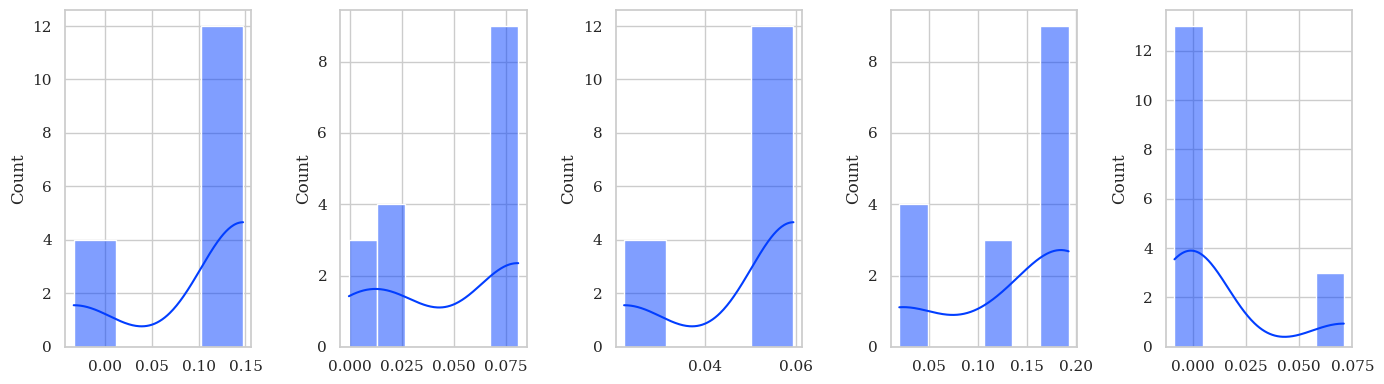

In [35]:
enumeration = 1
fig = plt.figure(figsize=(14, 4), dpi=100)
for i in range(5):
    plt.subplot(1, 5, enumeration)
    data = (y_test_list[i].values - y_pred_list[i])
    
    sns.histplot(data, bins=len(set(data)) * 2, kde=True)
    enumeration += 1
    
plt.tight_layout()
plt.show()

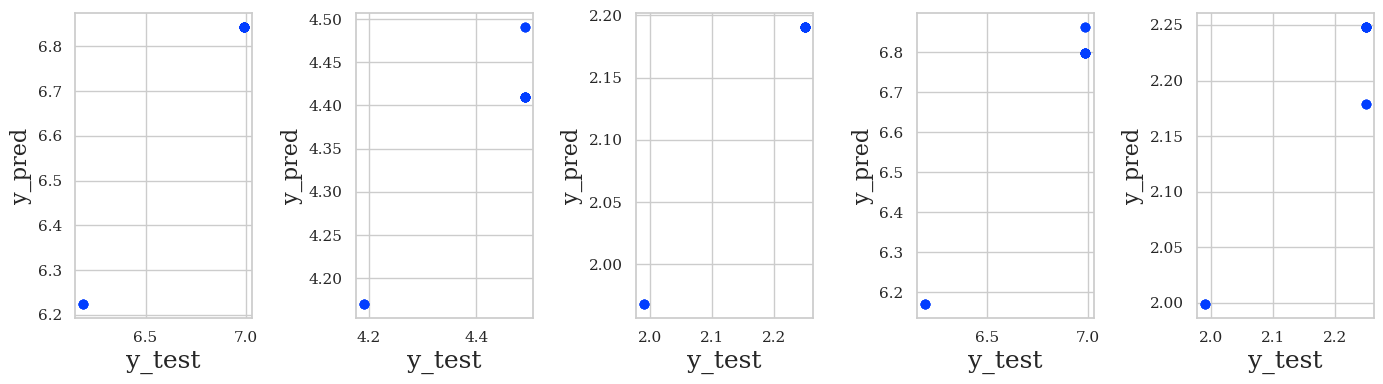

In [36]:
enumeration = 1
fig = plt.figure(figsize=(14, 4), dpi=100)
for i in range(5):
    plt.subplot(1, 5, enumeration)
    
    plt.scatter(y_test_list[i].values, y_pred_list[i])
    plt.xlabel('y_test')                         
    plt.ylabel('y_pred')
    enumeration += 1
    
plt.tight_layout()
plt.show()

In [37]:
top_regr

,dependent,model,independent_parameters,score
2605,"934052, Pitsa salaami ja chorizo Feliciana 320g",lregression,"[194914, Nisujahu 00 Pitsa Il Molino Chiavazza...",0.949
2198,"952601, Pitsataigen Eesti Pagar 2x300g",lregression,"[194913, Nisujahu 00 Il Molino Chiavazza 1kg, ...",0.949
2962,"296859, Singi-ja šampinjonipitsa külmut. 425g",lregression,"[194914, Nisujahu 00 Pitsa Il Molino Chiavazza...",0.948
3082,"296859, Singi-ja šampinjonipitsa külmut. 425g",lregression,"[194914, Nisujahu 00 Pitsa Il Molino Chiavazza...",0.946
1661,"298171, Õuna-rabarberikook ELT 800g",lregression,"[Piim 2,5%, 1 l, ALMA, 194914, Nisujahu 00 Pit...",0.946


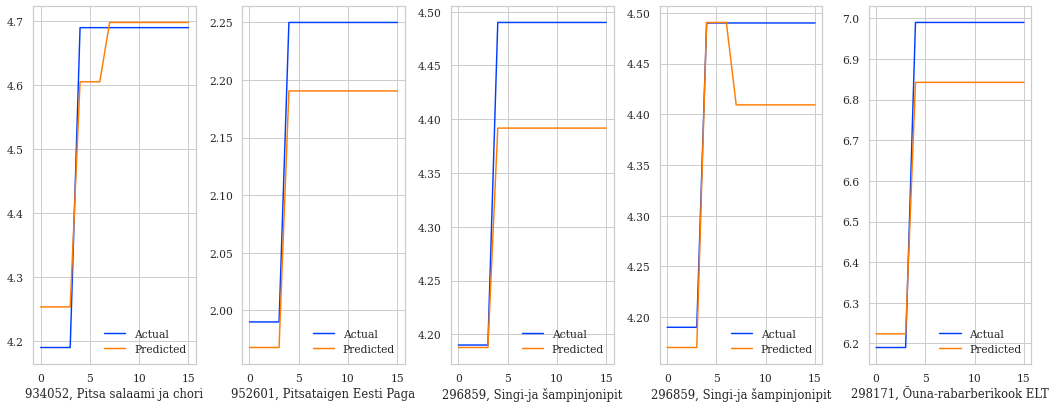

In [38]:
enumeration = 1

# removing duplicated columns
prices = prices.loc[:,~prices.columns.duplicated()].copy()
fig = plt.figure(figsize=(15, 6), dpi=70)
y_test_list = list()
y_pred_list = list()

for id, entry in top_regr.iterrows():
    x = prices[entry['independent_parameters']]
    y = prices[entry['dependent']]
    
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0, shuffle=False)
    model = RidgeCV()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)

    plt.subplot(1, 5, enumeration)
    plt.plot(range(len(y_test)), y_test)
    plt.plot(range(len(y_pred)), y_pred)
    plt.legend(['Actual', 'Predicted'])
    plt.xlabel(entry['dependent'][:30])
    enumeration += 1

plt.tight_layout()
plt.show()

#### Error terms:

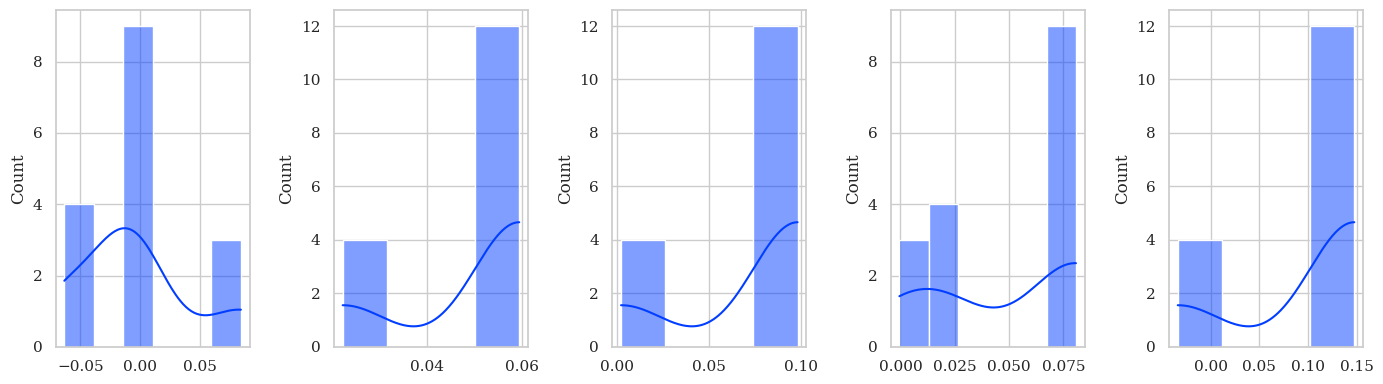

In [39]:
enumeration = 1
fig = plt.figure(figsize=(14, 4), dpi=100)
for i in range(5):
    plt.subplot(1, 5, enumeration)
    data = (y_test_list[i].values - y_pred_list[i])
    
    sns.histplot(data, bins=len(set(data)) * 2, kde=True)
    enumeration += 1
    
plt.tight_layout()
plt.show()

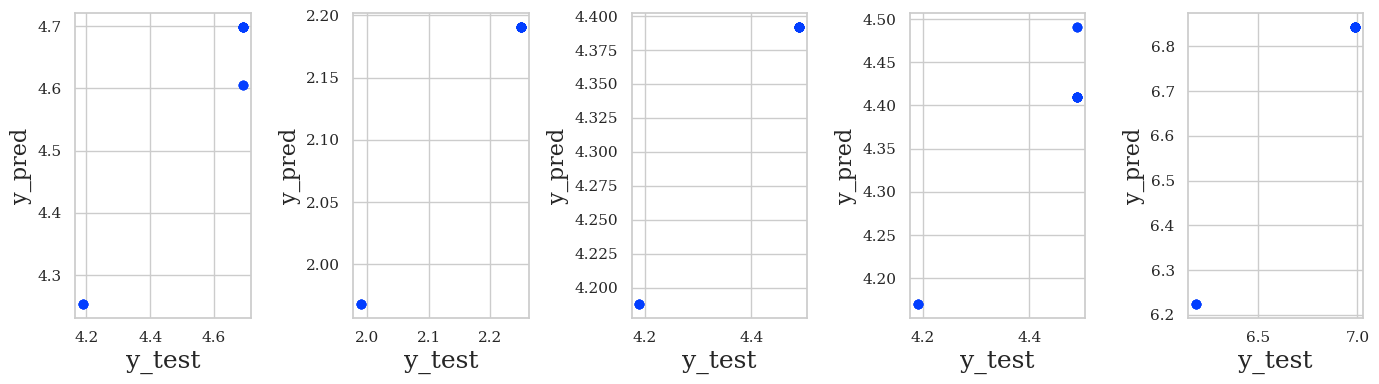

In [40]:
enumeration = 1
fig = plt.figure(figsize=(14, 4), dpi=100)
for i in range(5):
    plt.subplot(1, 5, enumeration)
    
    plt.scatter(y_test_list[i].values, y_pred_list[i])
    plt.xlabel('y_test')                         
    plt.ylabel('y_pred')
    enumeration += 1
    
plt.tight_layout()
plt.show()
    

# Conclusion

The distribution of model error terms are not normal, although R squared being rather high. It is not necessary that error terms are normally distributed according to Gauss-Markov theorem, but error terms should not be correlated, should show zero mean value, and they should show equal variance.

Despite rather poor error term distribution, the models with high enough R squared value can be used to predict prices.